# Module 1-3 Worksheet: Persistent Homology Pipelines

<font color = 'purple'>
    
*Once we are done talking through the slides from [the main module 1-3 notebook](1-3-PersistencePipelines.ipynb), we will take some time to test out your understanding of the definitions by working through the following questions. We encourage talking to your neighbor, and drawing pictures for understanding! Please ask if you need help!*
    
</font>


In [3]:
# Run this code once to make the answer widgets work

import ipywidgets as widgets
from IPython.display import display, Image
button = widgets.Button(description="Reveal Answer")

def on_button_clicked(b):
    global filename
    display(Image(filename=filename, width='auto', height='auto'))

In [54]:
# Standard imports

import numpy as np
import matplotlib.pyplot as plt

from teaspoon.TDA.Draw import drawDgm

The goal of this worksheet is to give you some starter code to build examples, and to build a connection between types of input filtrations and the resulting persistence diagrams. We have two sections:
- Point cloud input data, where we are building a Rips complex filtration; and 
- Matrix/Image data. 

# 1. Input data: Point cloud 

<font color = 'purple'><b>Question:</b></font>
My question goes here

*Space for your notes/answer*

*The correct answer is hidden here. Highlight or double-click to open the cell to see it when you're ready. No peeking!*

<font color='white'>
    
Hidden solution goes in here.     
</font>

## <font color = 'purple'>Take home message:</font>
- TODO

## Challenge problem

If you have a ton of time left, here's a challenge problem to think about. 

TODO 

<font color = 'purple'><b>Question:</b></font>
What is the homology for the 

*Space for your notes/answer*

*The correct answer is hidden here. Highlight or double-click to open the cell to see it when you're ready. No peeking!*

<font color='white'>
    
Hidden solution goes in here.     
</font>

# Challenge Problem

# 2. Input data: Matrix

In this section, we assume that you are given a black and white image (AKA a matrix) as input, and intend to do sublevelset persistence. For the purposes of this worksheet, we will assume we are represenging our sublevelsets at a fixed function value by the top dimensional cells (squares). 

## Sample matrix

Consider the following matrix. Draw the sublevel sets at levels 1, 2, and 3. Compare with answers hidden below

<img src = 'figures/Cubical/Nice_Example_Matrix.png' width = 20% height = 'auto'>


Button(description='Reveal Answer', style=ButtonStyle())

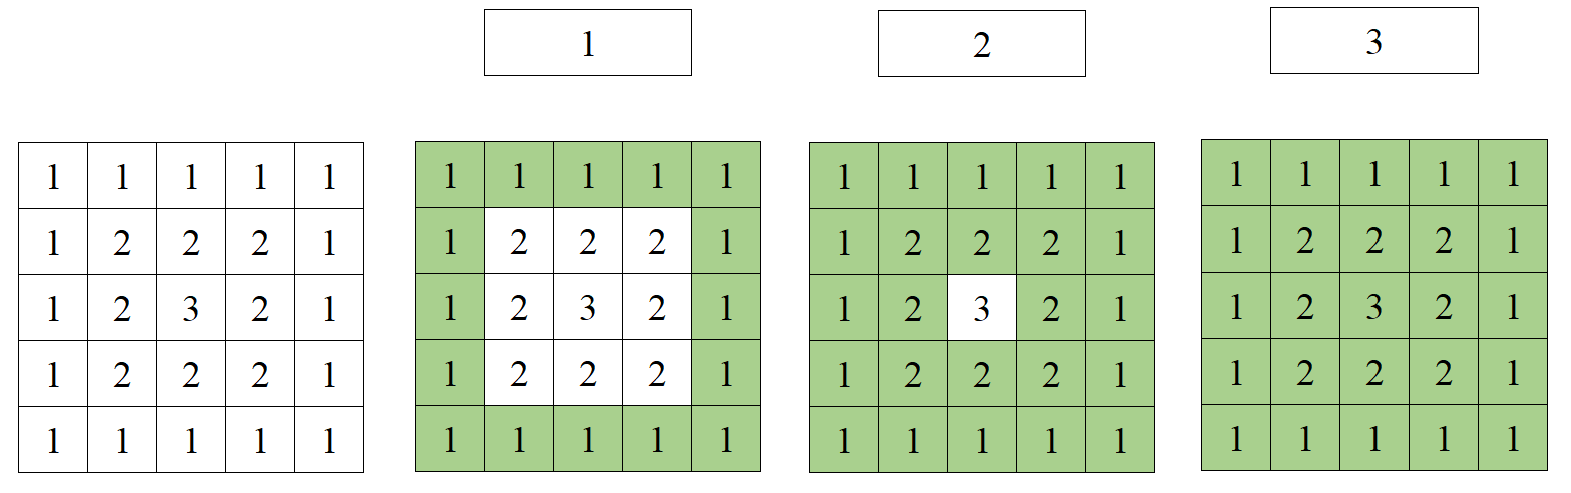

In [4]:
# Run this cell everytime

display(button)
filename = 'figures/Cubical/Nice_Example.png'
button.on_click(on_button_clicked)

### Code version 

Of course, we won't expect you to be computing persistence on your input data by yourself, so the following blocks will provide code for computing persistence on this filtration for you. 

In [59]:
# Import Libraries. 
# In this case, we will use giotto-tda for cubical computations

from gtda.homology import CubicalPersistence
from gtda.diagrams import Filtering

[[1 1 1 1 1]
 [1 2 2 2 1]
 [1 2 3 2 1]
 [1 2 2 2 1]
 [1 1 1 1 1]]


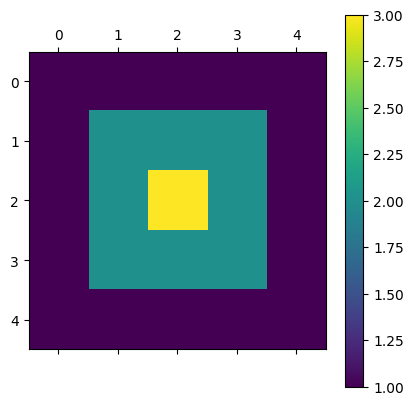

In [60]:
# Here is the code that generates our simple example matrix above.
Density = np.array([[1, 1, 1, 1, 1], 
                    [1, 2, 2, 2, 1], 
                    [1, 2, 3, 2, 1],
                    [1, 2, 2, 2, 1],
                    [1, 1, 1, 1, 1]])
print(Density)

im = plt.matshow(Density)
plt.colorbar()

Now with our simple input example, we can compute the sublevelset persistence using the following code.

In [64]:
# Find Cubical Persistence

Density = np.array([Density])
cubical_persistence = CubicalPersistence(n_jobs=-1, reduced_homology=True)
Persistence = cubical_persistence.fit_transform(Density)

filtered = Filtering(epsilon=10 ** -2)
Filtered_Persistence = filtered.fit_transform(Persistence)[0]

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


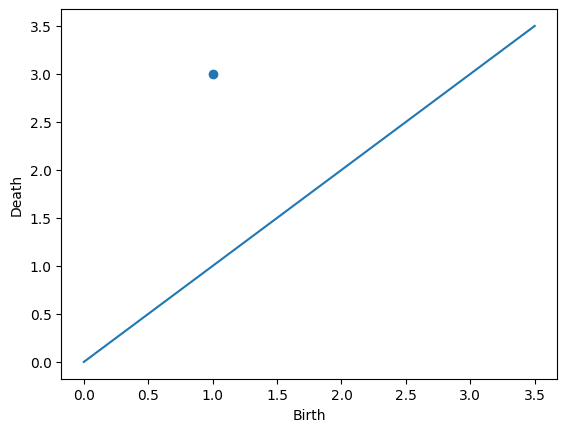

In [65]:
Rows = Filtered_Persistence[:,2]==1
Dgm = Filtered_Persistence[Rows,:2]
drawDgm(Dgm)

To see the resulting persistence diagram in case of issues, click the button below. 

Button(description='Reveal Answer', style=ButtonStyle())

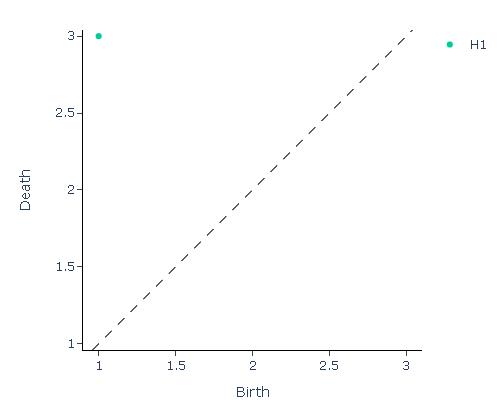

In [25]:
# Run this cell everytime

display(button)
filename = 'figures/Cubical/Nice_Example_PD.png'
button.on_click(on_button_clicked)

Based on your persistence diagram above, test your understanding of the persistence diagram using the following questions.

<font color = 'purple'><b>Question:</b></font>
There is a single point in the persistence diagram. When is the associated class birth time and death time? 

_Your answer_

*The correct answer is hidden here. Highlight or double-click to open the cell to see it when you're ready. No peeking!*

<font color='white'>
    The class is born at 1 and dies at 3. 
</font>

<font color = 'purple'><b>Question:</b></font>
What is the persistence (also called lifetime) of the component?

_Your answer_

*The correct answer is hidden here. Highlight or double-click to open the cell to see it when you're ready. No peeking!*

<font color='white'>
    The lifetime is death time minus birth time, so in this case $3-1=2$.
    
</font>

<font color = 'purple'><b>Question:</b></font>
Can you change the value of one pixel in this matrix in order to increase the lifetime of this class? Which one?

_Your answer_

*The correct answer is hidden here. Highlight or double-click to open the cell to see it when you're ready. No peeking!*

<font color='white'>
    If you increase the value of the center pixel, the death time will increase to whatever value you choose so you can make your lifetime as long as you want. 
</font>

## A more complex example: Sample Density

Below, we have included a more complicated (and more interesting!) function to try out cubical persistence. 

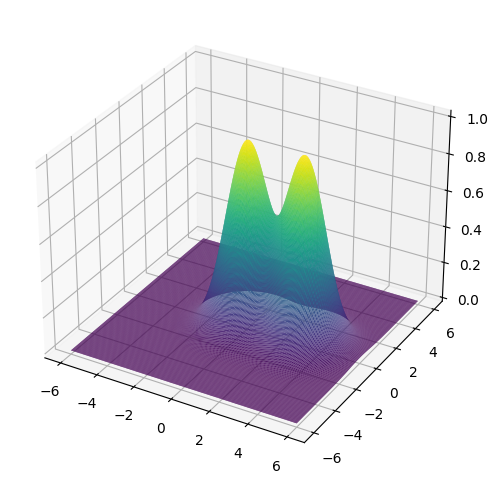

In [66]:
# Generate grid and function

X1, X2 = np.mgrid[-6:6:250j, -6:6:250j]
Density = np.exp(-0.5 * (X1 ** 2 + X2 ** 2)) + np.exp(-0.5 * ((X1-3) ** 2 + X2 ** 2))
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X1, X2, Density, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
plt.show()

The image is included below in case of plotting issues above. 

In [67]:
# Run this cell everytime

display(button)
filename = 'figures/Cubical/Gaussian.png'
button.on_click(on_button_clicked)

Button(description='Reveal Answer', style=ButtonStyle())

<font color = 'purple'><b>Question:</b></font>
Before attempting to use the code to compute persistence, how many points do you expect to see in the 1-dimensional persistence diagram?

_Your answer_

*The correct answer is hidden here. Highlight or double-click to open the cell to see it when you're ready. No peeking!*

<font color='white'>
   You should expect to see two points, but you're about to go find that out in the next code example anyway. 
</font>

## Use the code below to compute the persistence diagram

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


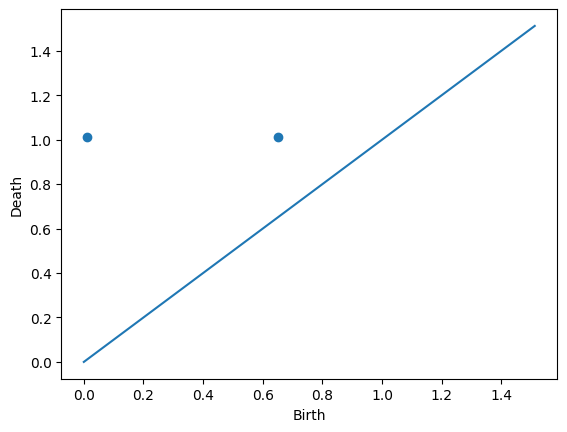

In [68]:
# Find Cubical Persistence

Density = np.array([Density])
cubical_persistence = CubicalPersistence(n_jobs=-1, reduced_homology=True)
Persistence = cubical_persistence.fit_transform(Density)

filtered = Filtering(epsilon=10 ** -2)
Filtered_Persistence = filtered.fit_transform(Persistence)[0]
Rows = Filtered_Persistence[:,2]==1
Dgm = Filtered_Persistence[Rows,:2]
drawDgm(Dgm)

See below in case of plotting or computation issues.

Button(description='Reveal Answer', style=ButtonStyle())

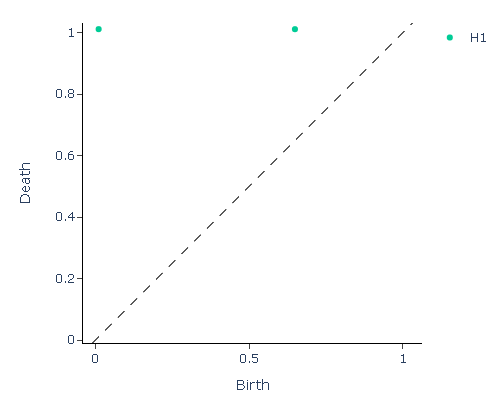

In [70]:
# Run this cell everytime

display(button)
filename = 'figures/Cubical/Gaussian_PD.png'
button.on_click(on_button_clicked)

## Answer the following:

### What is the death value of the components?

_Your answer_

*The correct answer is hidden here. Highlight or double-click to open the cell to see it when you're ready. No peeking!*

<font color='white'>
    Death is at 1 for both of them
</font>

### In the density, what does this death value correspond to?

_Your answer_

*The correct answer is hidden here. Highlight or double-click to open the cell to see it when you're ready. No peeking!*

<font color='white'>
    It corresponds to the height of the peaks
</font>

### What is the approximate birth value of the younger component?

_Your answer_

*The correct answer is hidden here. Highlight or double-click to open the cell to see it when you're ready. No peeking!*

<font color='white'>
    Between 0.6 and 0.7
</font>

### In the density, what does this birth value correspond to?

_Your answer_

*The correct answer is hidden here. Highlight or double-click to open the cell to see it when you're ready. No peeking!*

<font color='white'>
    It corresponds to the height where the function separates out into two peaks
</font>

# Long Problem

## Sample matrix

<img src = 'figures/Cubical/Cubical_Example_Matrix.png' width = 40% height = 'auto'>

### Find the sublevel sets at levels 1 to 6 (use any scratch paper)

Compare with the answers hidden below

In [96]:
# Run this cell everytime

display(button)
filename = 'figures/Cubical/Cubical_Example_Answer.png'
button.on_click(on_button_clicked)

Button(description='Reveal Answer', style=ButtonStyle())

## Write down the homology at each level

_Your answer_

*The correct answer is hidden here. Highlight or double-click to open the cell to see it when you're ready. No peeking!*

<font color='white'>
Level 1: 0 H0 components, 3 H1 component
Level 2: 0 H0 components, 2 H1 component
Level 3: 0 H0 components, 1 H1 component
Level 4: 1 H0 components, 2 H1 component
Level 5: 1 H0 components, 1 H1 component
Level 6: 0 H0 components, 0 H1 component
</font>

# Challenge Problem

Here's a chunk of code to find the persistence for the example you computed

In [97]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt
from gtda.homology import CubicalPersistence
from gtda.diagrams import Filtering

In [98]:
Density = np.array([np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), np.array([1, 3, 3, 3, 3, 3, 6, 6, 6, 1]), np.array([1, 3, 5, 5, 4, 4, 6, 4, 6, 1]), np.array([1, 3, 5, 5, 4, 4, 6, 4, 6, 1]), np.array([1, 3, 3, 3, 3, 3, 6, 6, 6, 1]), np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), np.array([1, 3, 3, 1, 1, 1, 2, 1, 1, 1]), np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])])
print(Density)

[[1 1 1 1 1 1 1 1 1 1]
 [1 3 3 3 3 3 6 6 6 1]
 [1 3 5 5 4 4 6 4 6 1]
 [1 3 5 5 4 4 6 4 6 1]
 [1 3 3 3 3 3 6 6 6 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 3 3 1 1 1 2 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]


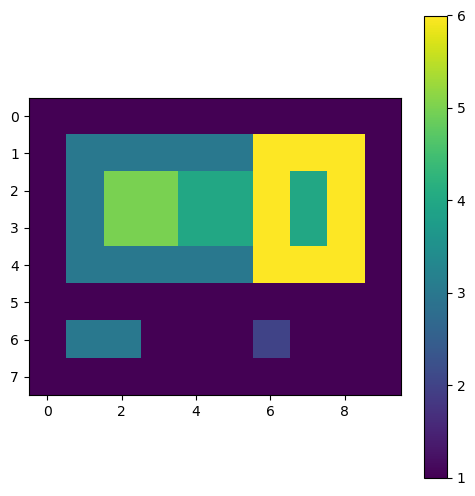

In [99]:
fig = plt.figure(figsize=(6, 6))
plt.imshow(Density)
plt.colorbar()

In [100]:
# Find Cubical Persistence

Density = np.array([Density])
cubical_persistence = CubicalPersistence(n_jobs=-1, reduced_homology=True)
Persistence = cubical_persistence.fit_transform(Density)

filtered = Filtering(epsilon=10 ** -2)
Filtered_Persistence = filtered.fit_transform(Persistence)
plot = filtered.plot(Filtered_Persistence)
plot.show()

In case the code doesn't run for you, click the button below to see the persistence diagram.

In [101]:
# Run the cell first

display(button)
filename = 'figures/Cubical/Cubical_Example_PD.png'
button.on_click(on_button_clicked)

Button(description='Reveal Answer', style=ButtonStyle())

# Advanced Problem

In [102]:
# Generate grid and function

X1, X2 = np.mgrid[-3:3:250j, -3:3:250j]
Density = np.exp(-0.5 * ((X1 ** 2 + X2 ** 2) ** 2 - 4 * (X1 ** 2 + X2 ** 2)))

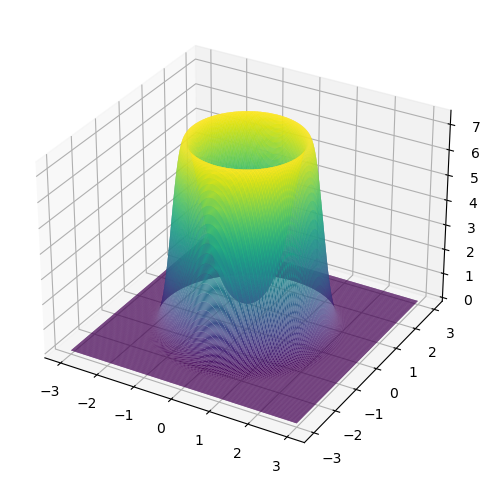

In [103]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X1, X2, Density, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

### What do you expect the persistence diagram to have?

_Your Answer_

*The correct answer is hidden here. Highlight or double-click to open the cell to see it when you're ready. No peeking!*

<font color='white'>
One $H_0$ and one $H_1$ component.    
</font>

In [104]:
# Find Cubical Persistence

Density = np.array([Density])
cubical_persistence = CubicalPersistence(n_jobs=-1, reduced_homology=True)
Persistence = cubical_persistence.fit_transform(Density)

filtered = Filtering(epsilon=10 ** -2)
Filtered_Persistence = filtered.fit_transform(Persistence)
plot = filtered.plot(Filtered_Persistence)
plot.show()

## Which component class can you notice a relation of the depth of the crater with?

*The correct answer is hidden here. Highlight or double-click to open the cell to see it when you're ready. No peeking!*

<font color='white'>
The life (death - birth) of $H_0$ corresponds to the depth of the crater.    
</font>

## In these modules, we have only found sublevel persistence

### That is: Everything below the threshold is included, everything above is excluded

#### Here's an animation which computes superlevel persistence, we'll look at these more in Module 2-4 while discussing stochastic bifurcations

![](figures/Stochastic/Cubical.gif)